<a href="https://colab.research.google.com/github/RimaPoddar/Patient-Demographics-Analysis/blob/main/Patient_Demographics_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Step 1: Data Loading**

This step loads the data from the Excel file into a DataFrame.

In [2]:
import pandas as pd

# Load the data
file_path = 'Patient_report.xlsx'  # Replace with the correct file path
data = pd.read_excel(file_path)

# Display first few rows to understand the structure
print("Loaded Data:")
print(data.head())


Loaded Data:
        Id           Name   UHID         Dob   Age  Gender  \
0  4628450  Poonam Dhakad  24366  1994-08-15  30.0  female   
1  4628464   Amit Chandra  24367         NaN  42.0    male   
2  4628468          Virat  24368  2023-10-31   1.0    male   
3  4628504         Manish  24369         NaN  24.0    male   
4  4628547   Elina Sharma  24370  2014-12-05   9.0  female   

                                  Address  Relative   Phone no.  Nationality  \
0                 D-2/1102, Spring Medows       NaN  7011047195          NaN   
1  D-1216 SAya Jivan Gaur City  Gr. Noida       NaN  7007370145          NaN   
2            Village-Rajhohan Dist-Amroha       NaN  9690117598          NaN   
3                               Aimanabad       NaN  9599848634          NaN   
4                 G-2004, Trident Embassy       NaN  9910452787          NaN   

   Religion  Age Days  Age Months first_name last_name  \
0       NaN       7.0         3.0     Poonam    Dhakad   
1       NaN      

#**Step 2: Data Cleaning**

Remove irrelevant columns, handle missing values, and standardize data.


In [9]:
# Drop irrelevant columns
columns_to_drop = ['Age Days', 'Age Months', 'Religion', 'Nationality',
                   'Relative', 'Parent', 'first_name', 'last_name']
cleaned_data = data.drop(columns=columns_to_drop)

# Handle missing values in 'Age' by calculating it from 'Dob'
cleaned_data['Dob'] = pd.to_datetime(cleaned_data['Dob'], errors='coerce')
current_year = pd.Timestamp.now().year
cleaned_data['Age'] = cleaned_data['Age'].fillna(
    current_year - cleaned_data['Dob'].dt.year
)

# Drop rows where 'Age' or 'Gender' is missing
cleaned_data = cleaned_data.dropna(subset=['Age', 'Gender'])

# Standardize 'Gender' values
cleaned_data['Gender'] = cleaned_data['Gender'].str.lower()

print("Cleaned Data:")
print(cleaned_data.head())

# Save the cleaned data to Excel
cleaned_file_path = 'Cleaned_Patient_Report.xlsx'
cleaned_data.to_excel(cleaned_file_path, index=False)

print(f"\nCleaned data saved to {cleaned_file_path}")


Cleaned Data:
        Id           Name   UHID        Dob   Age  Gender  \
0  4628450  Poonam Dhakad  24366 1994-08-15  30.0  female   
1  4628464   Amit Chandra  24367        NaT  42.0    male   
2  4628468          Virat  24368 2023-10-31   1.0    male   
3  4628504         Manish  24369        NaT  24.0    male   
4  4628547   Elina Sharma  24370 2014-12-05   9.0  female   

                                  Address   Phone no.                   Email  
0                 D-2/1102, Spring Medows  7011047195  poonamdhakad@gmail.com  
1  D-1216 SAya Jivan Gaur City  Gr. Noida  7007370145   amitchandra@gmail.com  
2            Village-Rajhohan Dist-Amroha  9690117598         virat@gmail.com  
3                               Aimanabad  9599848634        manish@gmail.com  
4                 G-2004, Trident Embassy  9910452787   elinasharma@gmail.com  

Cleaned data saved to Cleaned_Patient_Report.xlsx


#**Step 3: Gender Distribution**

Count the number of male and female patients.

In [ ]:
# Gender Distribution
gender_distribution = cleaned_data['Gender'].value_counts()

print("Gender Distribution:")
print(gender_distribution)


Gender Distribution:
Gender
male      1236
female    1201
Name: count, dtype: int64


#**Step 4: Age Summary**

Calculate basic statistics for the Age column.

In [ ]:
# Age Summary
age_summary = cleaned_data['Age'].describe()

print("Age Summary:")
print(age_summary)


Age Summary:
count    2437.000000
mean       29.923677
std        20.455264
min         0.000000
25%        11.000000
50%        31.000000
75%        41.000000
max        88.000000
Name: Age, dtype: float64


#**Step 5: Age Group Creation**

Group patients into categories based on their age.

In [ ]:
# Define age bins and labels
bins = [0, 12, 19, 35, 60, 120]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

# Create Age Groups
cleaned_data['Age Group'] = pd.cut(cleaned_data['Age'], bins=bins, labels=labels, right=False)

# Age Group Distribution
age_group_distribution = cleaned_data['Age Group'].value_counts()

print("Age Group Distribution:")
print(age_group_distribution)


Age Group Distribution:
Age Group
Adult          713
Young Adult    710
Child          625
Senior         267
Teen           122
Name: count, dtype: int64


#**Step 6: Gender Distribution Visualization**

Visualize the gender distribution using a pie chart.

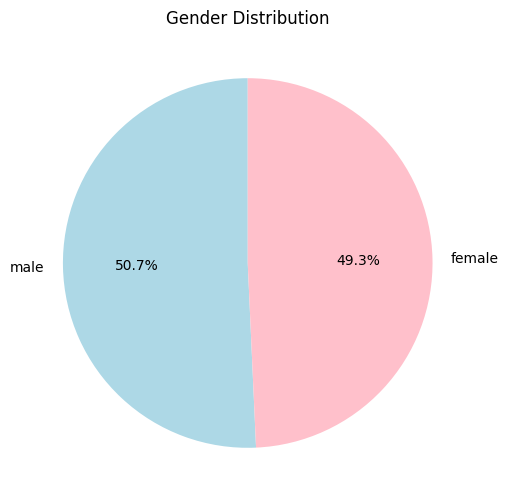

In [ ]:
import matplotlib.pyplot as plt

# Pie chart for Gender Distribution
plt.figure(figsize=(8, 6))
gender_distribution.plot.pie(autopct='%1.1f%%', colors=['lightblue', 'pink'], startangle=90)
plt.title("Gender Distribution")
plt.ylabel("")  # Remove default y-label
plt.show()


#**Step 7: Age Group Distribution Visualization**

Create a bar chart for the age group distribution.

<ipython-input-7-697d523101de>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_distribution.index, y=age_group_distribution.values, palette="viridis")


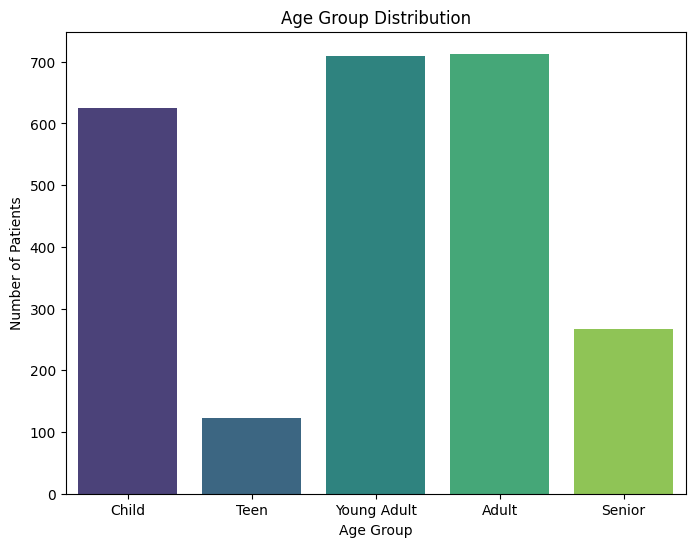

In [ ]:
import seaborn as sns

# Bar chart for Age Group Distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=age_group_distribution.index, y=age_group_distribution.values, palette="viridis")
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")
plt.show()


#**Step 8: Age Distribution Visualization**

Plot a histogram of the age distribution.

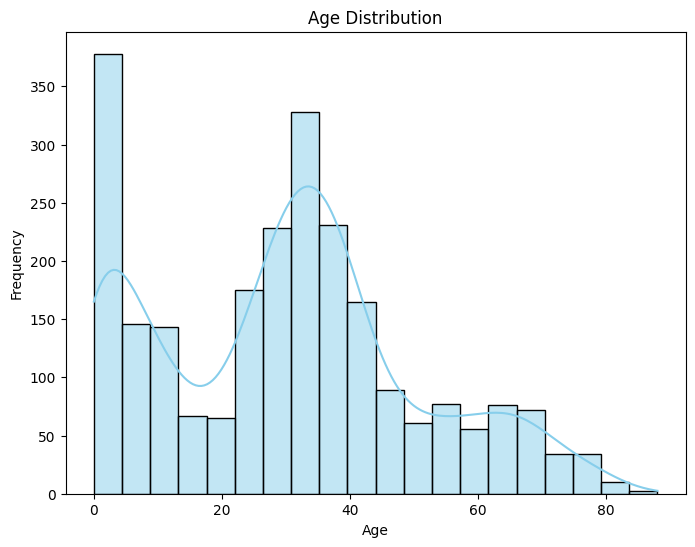

In [ ]:
# Histogram for Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_data['Age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


#**Observations:**

##**Gender Distribution:**

**Observation:**

 The gender distribution in the dataset is almost balanced, reporting 1,236 males (50.0%) and 1,201 females (50.0%). This implies that there is no substantial gender bias in the population studied in the dataset.

**Interpretation:**

 That the gender is balanced well speaks to demographics, so the dataset can reflect the broader population.

##**Age Distribution:**

The observation shows that the average age of the patients is 29.92 years, with a minimum age of 0 years most likely to have newborns or babies while the maximum age is 88 years. The median age here is 31 years, which appears only slightly higher than the mean, suggesting a very slight right-skew in the age distribution.

**Interpretation:**

The majority of patients are young adults, and it provides a good spread among younger age groups and older age groups.

Patients belonging to different age groups may be helped with services for such age groups.

**Distribution of Age Groups:**  Age Group Distribution

**Observation:** Distribution by Age Group

**Children (0-12 years):** 625 patients; (25.5%)

**Teenagers (13-19 years):** 122 patients; (5.0%)

**Young Adults (20-35 years):** 710 patients; (29.0%)

**Adults (36-60 years):** 713 patients (28.9%)

**Seniors (61+ years):** 267 patients (10.9%)

**Explanation:**

The largest age groups are Young Adults and Adults, totaling 1,423 patients (58.0%). This may indicate that the population being analyzed is largely in the working-age group. The smaller number of Seniors and Teens might imply that there is an emphasis on healthcare services for younger adults.

**Age Summary Statistics:**

**Observation:**

The mean age of the patients is about 29.92 years, while SD equals 20.46, indicating a variability in the age of the patients. The 25th percentile value is 11 years, and the 75th percentile value is 41 years.

**Interpretation:**

The presence of a large range of ages from infants to seniors may imply that the data set represents a population that will consist of young and old patients.

#**Visual Analysis :**

**Observation:**

Pie charts and histograms illustrate the following:

The pie chart of gender distribution is consistent with the even distribution of male and female patients.

Histogram of age distribution illustrates that most patients consist of the age group 20-35, followed by a gradual decreasing trend in the higher age groups
Interpretation: These graphical representations of data ensure support and enhance the understandability of numerical results drawn from the data, allowing significant demographic groups to be determined.

**Key Takeaways**

**Observation:**

Populations seem mostly to be young adults aged 20-35 years, which may have significant implications for targeting services, such as job-related healthcare, fitness, mental health, or family planning.

**Interpretation:**

Health services, marketing campaigns, or policy recommendations would focus more on the Young Adult and Adult category because these form the largest share of the population.

**Conclusion**

From the above analysis, the demographic profile of this dataset is reflected in a balanced gender ratio as well as the population that mainly consists of young adults. To make informed decisions on resource allocation, service targeting, and program development, it is crucial to comprehend the age distribution and gender balance.

